In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
import scanpy as sc

# Load gene expression dataset

In [2]:
adata = sc.datasets.ebi_expression_atlas("E-GEOD-131882",filter_boring=True) # data from SeuratData::ifnb

In [3]:
adata.obs.head()

,Sample Characteristic[individual],Sample Characteristic[sex],Sample Characteristic Ontology Term[sex],Sample Characteristic[age],Sample Characteristic[disease],Sample Characteristic Ontology Term[disease],Sample Characteristic[clinical information],Sample Characteristic[clinical treatment],Factor Value[disease],Factor Value Ontology Term[disease]
SAMN11878523-AAACCTGAGTTTAGGA,Diabetes_3,female,http://purl.obolibrary.org/obo/PATO_0000383,57 year,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401,"hemoglobin A1c 9.7 mmol/mol, glomerular filtra...",radical nephrectomy,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401
SAMN11878523-AAACCTGCAGAGTGTG,Diabetes_3,female,http://purl.obolibrary.org/obo/PATO_0000383,57 year,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401,"hemoglobin A1c 9.7 mmol/mol, glomerular filtra...",radical nephrectomy,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401
SAMN11878523-AAACCTGCAGCCTGTG,Diabetes_3,female,http://purl.obolibrary.org/obo/PATO_0000383,57 year,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401,"hemoglobin A1c 9.7 mmol/mol, glomerular filtra...",radical nephrectomy,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401
SAMN11878523-AAACCTGCATCCCATC,Diabetes_3,female,http://purl.obolibrary.org/obo/PATO_0000383,57 year,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401,"hemoglobin A1c 9.7 mmol/mol, glomerular filtra...",radical nephrectomy,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401
SAMN11878523-AAACCTGTCCAGAAGG,Diabetes_3,female,http://purl.obolibrary.org/obo/PATO_0000383,57 year,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401,"hemoglobin A1c 9.7 mmol/mol, glomerular filtra...",radical nephrectomy,diabetic nephropathy,http://www.ebi.ac.uk/efo/EFO_0000401


In [4]:
adata.var.head()

""
ENSG00000000003
ENSG00000000005
ENSG00000000419
ENSG00000000457
ENSG00000000460


# Preprocess data

In [5]:
# preprocessing
print(adata.shape)
sc.pp.filter_cells(adata, min_genes=int(adata.X.shape[1])*0.01)
print(adata.shape)
sc.pp.filter_genes(adata, min_cells=int(adata.X.shape[0])*0.01)
print(adata.shape)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)

adata.obs.groupby('Factor Value[disease]')['Sample Characteristic[individual]'].value_counts()

(16536, 23817)
(16512, 23817)
(16512, 14518)


/var/folders/g9/sdkd_scd1jl863ct2t6hw_k80000gp/T/ipykernel_8338/1731056606.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Factor Value[disease]')['Sample Characteristic[individual]'].value_counts()


Factor Value[disease]  Sample Characteristic[individual]
diabetic nephropathy   Diabetes_1                           3300
                       Diabetes_3                           1981
                       Diabetes_2                           1625
                       Control_1                               0
                       Control_2                               0
                       Control_3                               0
normal                 Control_1                            4700
                       Control_3                            3581
                       Control_2                            1325
                       Diabetes_1                              0
                       Diabetes_2                              0
                       Diabetes_3                              0
Name: count, dtype: int64

In [6]:
adata.obs['disease'] = pd.Categorical(adata.obs['Factor Value[disease]'], categories=["diabetic nephropathy", "normal"], ordered=True)
indices = adata.obs.sort_values(['Factor Value[disease]', 'disease']).index
adata = adata[indices,:]

# Focus on the most prevalent cell type

In [7]:
bdata = adata[adata.obs["Sample Characteristic[sex]"] == "male"].copy()# female
bdata

AnnData object with n_obs × n_vars = 10950 × 14518
    obs: 'Sample Characteristic[individual]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[clinical information]', 'Sample Characteristic[clinical treatment]', 'Factor Value[disease]', 'Factor Value Ontology Term[disease]', 'n_genes', 'disease'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

In [8]:
from collections import Counter
Counter(bdata.obs["Factor Value[disease]"])

Counter({'diabetic nephropathy': 4925, 'normal': 6025})

In [9]:
4925/(4925+6025)*100

44.97716894977169

In [10]:
bdata.shape

(10950, 14518)

# Map gene names

In [11]:
mapper = pd.read_csv('data/mart_export.txt',index_col=0).fillna(-1)["Gene name"].to_dict()

In [12]:
new_indexes = []
for i in bdata.var.index:
    if i in mapper and mapper[i]!="":
        new_indexes.append(mapper[i])
    else:
        new_indexes.append(-1)

In [13]:
bdata.var.index = new_indexes
bdata = bdata[:,bdata.var.index != -1]

In [14]:
bdata.shape

(10950, 13985)

In [15]:
bdata.var_names_make_unique()

/Users/speignier/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
bdata.to_df()

,TSPAN6,DPM1,SCYL3,FIRRM,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,PRRC2B,UGT1A3,UGT1A5,F8A1,CTAGE4-1,H2AC18,H2AC19,RPSA2,CTAGE8-1,XNDC1N-ZNF705EP-ALG1L9P
SAMN11878524-AAACCTGCACTTCTGC,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,-0.217042,-0.253165,-0.206149,-0.247156,4.024714,...,1.366851,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,1.903810,-0.260855,-0.221132
SAMN11878524-AAACCTGCAGGGTATG,-0.17146,-0.369714,-0.306025,-0.141667,2.473946,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,-0.572731,-0.16203,-0.166154,-0.106839,1.932244,-0.241111,-0.241115,-0.449898,1.973501,-0.221132
SAMN11878524-AAACGGGAGACATAAC,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,0.936168,-0.16203,-0.166154,-0.106839,-0.258052,2.038974,2.045414,-0.449898,-0.260855,-0.221132
SAMN11878524-AAACGGGAGCGTTTAC,-0.17146,-0.369714,-0.306025,-0.141667,1.969721,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,-0.572731,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,-0.449898,-0.260855,-0.221132
SAMN11878524-AAACGGGCACATGTGT,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,2.423924,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,-0.449898,-0.260855,-0.221132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMN11878528-TTTGTCAGTTCCGTCT,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,4.741707,-0.253165,-0.206149,-0.247156,-0.225779,...,2.269932,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,-0.449898,-0.260855,-0.221132
SAMN11878528-TTTGTCATCACCAGGC,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,-0.572731,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,-0.449898,-0.260855,4.384156
SAMN11878528-TTTGTCATCACCGTAA,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,-0.572731,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,-0.449898,-0.260855,-0.221132
SAMN11878528-TTTGTCATCCTACAGA,-0.17146,-0.369714,-0.306025,-0.141667,-0.482987,-0.217042,-0.253165,-0.206149,-0.247156,-0.225779,...,2.115871,-0.16203,-0.166154,-0.106839,-0.258052,-0.241111,-0.241115,-0.449898,-0.260855,-0.221132


# Run GSEA

In [17]:
gs = gp.get_library("GO_Biological_Process_2021")


In [18]:
import time
t1 = time.time()
res = gp.gsea(data=bdata.to_df().T,
        gene_sets=gs,
        cls=bdata.obs.disease,
        permutation_num=1000,
        outdir=None,
        threads= 8)
t2=time.time()
print(t2-t1)

/Users/speignier/anaconda3/lib/python3.10/site-packages/gseapy/gsea.py:110: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_std = df.groupby(by=cls_dict, axis=1).std(numeric_only=True, ddof=0)


135.6602258682251


In [19]:
res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,protein targeting to ER (GO:0045047),-0.795221,-3.187986,0.0,0.0,0.0,69/103,12.95%,RPS26;RPS4X;RPL26;RPLP1;RPS28;RPS15;RPS12;RPL3...
1,gsea,cotranslational protein targeting to membrane ...,-0.807238,-3.143485,0.0,0.0,0.0,69/94,12.95%,RPS26;RPS4X;RPL26;RPLP1;RPS28;RPS15;RPS12;RPL3...
2,gsea,SRP-dependent cotranslational protein targetin...,-0.811624,-3.140525,0.0,0.0,0.0,63/90,10.06%,RPS26;RPS4X;RPL26;RPLP1;RPS28;RPS15;RPS12;RPL3...
3,gsea,cytoplasmic translation (GO:0002181),-0.780188,-3.041181,0.0,0.0,0.0,62/93,10.06%,RPS26;RPS4X;RPL26;RPLP1;RPS28;RPS15;RPS12;RPL3...
4,gsea,peptide biosynthetic process (GO:0043043),-0.696594,-3.01888,0.0,0.0,0.0,91/148,18.13%,RPS26;RPS4X;RPL26;RPLP1;RPS28;RPS15;RPS12;RPL3...


In [20]:
sum(res.res2d["NOM p-val"]<0.011)/len(gs)*100

4.093470334769639

# Test GSHAPA

In [21]:
gs = gp.get_library("GO_Biological_Process_2021")#KEGG_2021_Human


In [ ]:
from gshapa.GSHAPA import GSHAPA3
from sklearn.ensemble import RandomForestClassifier
import time

In [23]:
t1 = time.time()

# Define parameters
MODEL = RandomForestClassifier(random_state=33,
                               max_features="sqrt",
                               n_estimators=1000,
                               n_jobs=-1)
                               
                               
                               
TEST_SET_SIZE = 0.2

# Build TreeSHAPGSEALite object
tsl = GSHAPA3(MODEL,TEST_SET_SIZE,random_state=33)

# Fit model
tsl.fit(bdata.to_df(), bdata.obs["disease"])

# Explain each gene contribution
X_explain = tsl.X_test[tsl.y_test=="diabetic nephropathy"]
tsl.shap(X_explain)

# Compute pvalues
res2 = tsl.explain_gene_sets(gs,'diabetic nephropathy',n_tests=1000)

t2=time.time()
print(t2-t1)

  0%|          | 0/6034 [00:00<?, ?it/s]

76.00607419013977


In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(tsl.y_test, tsl.model.predict_proba(tsl.X_test)[:,1])

0.9800901489142111

In [25]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(tsl.y_test, tsl.model.predict(tsl.X_test))

0.9324683530972893

In [26]:
from sklearn.metrics import classification_report
print(classification_report(tsl.y_test, tsl.model.predict(tsl.X_test)))

                      precision    recall  f1-score   support

diabetic nephropathy       0.93      0.92      0.93       985
              normal       0.94      0.94      0.94      1205

            accuracy                           0.93      2190
           macro avg       0.93      0.93      0.93      2190
        weighted avg       0.93      0.93      0.93      2190



In [27]:
sum(res2["P-values"]<0.011)/len(gs)*100

0.8783559827643355

# Compare both methods

In [28]:
pval_gsea= res.res2d["NOM p-val"]
pval_gsea.index = res.res2d["Term"]
pval_treeshap = res2["P-values"].loc[pval_gsea.index]

pvals = pd.DataFrame({"pval_gsea":pval_gsea,"pval_gshapa":pval_treeshap})

In [29]:
print(pd.crosstab(pvals["pval_gsea"]<0.011, pvals["pval_gshapa"]<0.011).to_latex())

\begin{tabular}{lrr}
\toprule
pval_gshapa & False & True \\
pval_gsea &  &  \\
\midrule
False & 1933 & 7 \\
True & 231 & 16 \\
\bottomrule
\end{tabular}



In [30]:
from scipy.stats import fisher_exact
fisher_exact(pd.crosstab(pvals["pval_gsea"]<0.011, pvals["pval_gshapa"]<0.011))

SignificanceResult(statistic=19.126777983920842, pvalue=5.278675298953697e-11)

In [31]:
pvals.sort_values("pval_gshapa")[:10]

,pval_gsea,pval_gshapa
Term,,
protein peptidyl-prolyl isomerization (GO:0000413),0.0,0.000
cellular response to cadmium ion (GO:0071276),0.0,0.001
peptidyl-proline modification (GO:0018208),0.0,0.001
response to copper ion (GO:0046688),0.0,0.003
response to zinc ion (GO:0010043),0.0,0.003
response to cadmium ion (GO:0046686),0.00198,0.003
cellular defense response (GO:0006968),0.101626,0.004
cellular divalent inorganic cation homeostasis (GO:0072503),0.001988,0.004
regulation of ossification (GO:0030278),0.101562,0.005


# Check specific patients

In [35]:
bdata_test = bdata[tsl.X_test.index]
bdata_test_patients = bdata_test[bdata_test.obs["Sample Characteristic[disease]"]=='diabetic nephropathy']
individuals = list(set(bdata_test_patients.obs["Sample Characteristic[individual]"]))

In [36]:
individuals_tests = {}
for i in individuals:
    print(i)
    bdataexplain = bdata_test_patients[bdata_test_patients.obs["Sample Characteristic[individual]"] == i]
    tsl.shap(bdata_explain.to_df())
    res_i = tsl.explain_gene_sets(gs,'diabetic nephropathy',n_tests=1000)
    individuals_tests[i] = res_i
    

Diabetes_1


  0%|          | 0/6034 [00:00<?, ?it/s]

Diabetes_2


  0%|          | 0/6034 [00:00<?, ?it/s]

In [37]:
p_values_patients = {}
for i in individuals_tests:
    res_i = individuals_tests[i]
    p_values_patients[i] = res_i["corrected P-values"]
p_values_patients = pd.DataFrame(p_values_patients)
scores = -np.log10(p_values_patients+1e-100)

In [38]:
significant_donors = scores[scores.sum(axis=1)>0]
significant_donors.columns = ["Donor "+c.split("_")[-1] for c in significant_donors.columns]

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


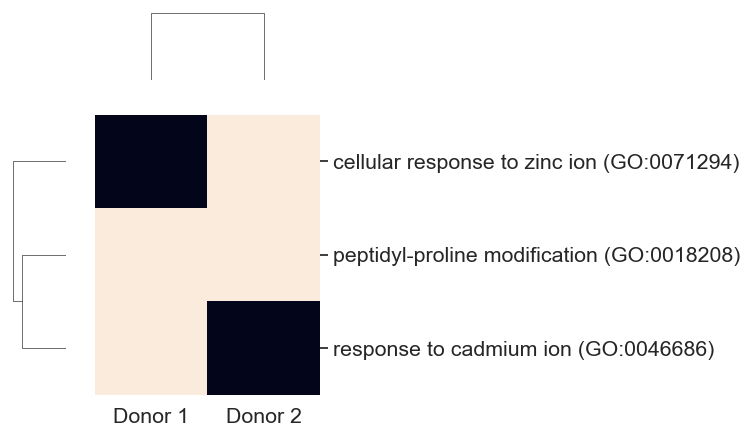

In [39]:
import seaborn as sns
sns.set(font_scale=1.4)
ax = sns.clustermap(significant_donors,figsize=(4,5),yticklabels=True,)
ax.cax.set_visible(False)